<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/inverse_kinematic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pxy=[]
angle=[]
for i in range(0,360,1):
  for j in range(0,180,1):
    pxy.append([50*np.cos(i*np.pi/180)+40*np.cos((i+j)*np.pi/180),
              50*np.sin(i*np.pi/180)+40*np.sin((i+j)*np.pi/180)])
    angle.append([i,j])
x = pd.DataFrame(np.c_[pxy],columns=['Px','Py'])
y = pd.DataFrame(np.c_[angle],columns=['tt1','tt2'])    
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,shuffle=True)

In [ ]:
from tensorflow.keras.optimizers import  SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(512,kernel_initializer='normal',activation='relu',input_shape=(2,)))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(2))
model.compile(optimizer=RMSprop(),loss='mse',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
365/365 [==============================] - 4s 8ms/step - loss: 6915.7715 - accuracy: 0.8010 - val_loss: 3304.8193 - val_accuracy: 0.8650
Epoch 2/10
365/365 [==============================] - 3s 7ms/step - loss: 2021.1606 - accuracy: 0.9014 - val_loss: 2616.6348 - val_accuracy: 0.9306
Epoch 3/10
365/365 [==============================] - 2s 7ms/step - loss: 1489.5471 - accuracy: 0.9241 - val_loss: 1243.2983 - val_accuracy: 0.9346
Epoch 4/10
365/365 [==============================] - 3s 7ms/step - loss: 1304.7273 - accuracy: 0.9259 - val_loss: 998.9150 - val_accuracy: 0.9334
Epoch 5/10
365/365 [==============================] - 3s 7ms/step - loss: 1176.8402 - accuracy: 0.9302 - val_loss: 1201.7581 - val_accuracy: 0.9275
Epoch 6/10
365/365 [==============================] - 2s 7ms/step - loss: 1078.2472 - accuracy: 0.9349 - val_loss: 2263.1235 - val_accuracy: 0.9194
Epoch 7/10
365/365 [==============================] - 3s 7ms/step - loss: 1004.0262 - accuracy: 0.9344 - val_loss

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/model/inverse_2.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/inverse_2.h5')

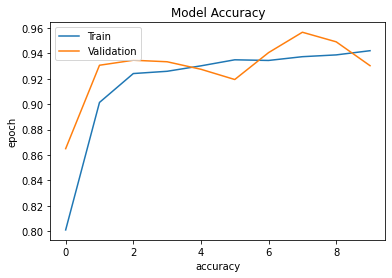

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model_1.predict(x_test)

array([[217.87036 ,  94.280205],
       [216.43306 ,  44.867943],
       [302.74475 ,  24.262793],
       ...,
       [326.60428 , 150.92598 ],
       [236.04971 ,  38.67199 ],
       [177.77779 ,  46.34661 ]], dtype=float32)

In [ ]:
y_test

,tt1,tt2
40053,222,93
62883,349,63
55475,308,35
46652,259,32
4464,24,144
...,...,...
26661,148,21
39251,218,11
57211,317,151
43219,240,19
